# Data Mining Lab 2 Take Home Exercises
## Hu Zhuochen (NCCU: 113308106)

---
### >>> Exercise 1 (Take home): 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


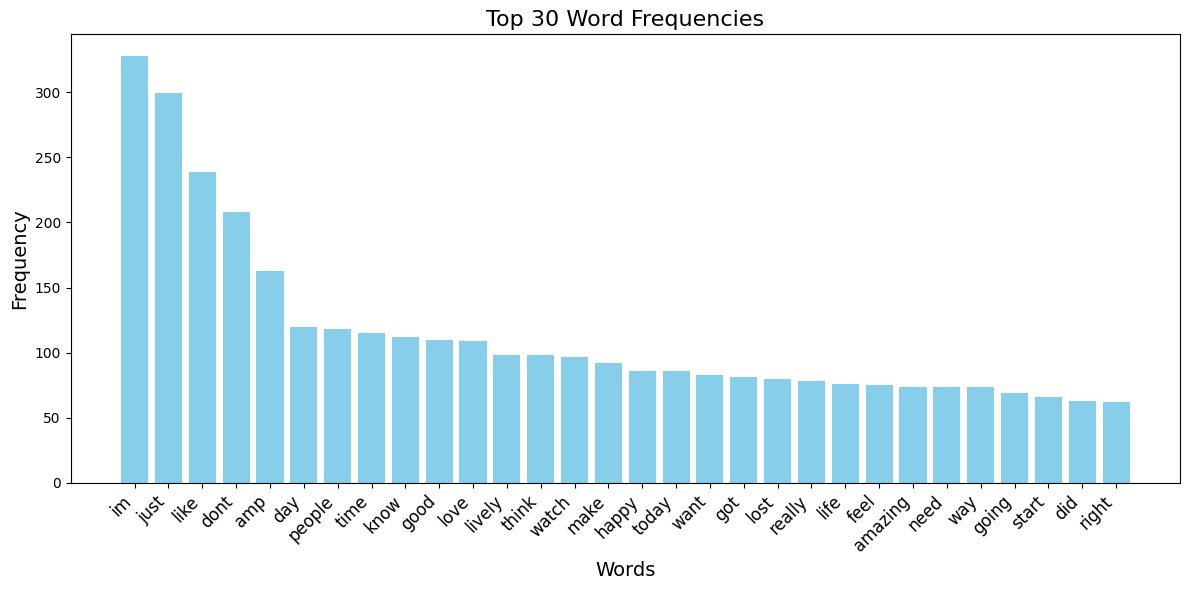

In [7]:
# My answer: Train DF

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

train_df["cleaned_text"] = train_df["text"].str.replace(r"[^a-zA-Z\s]", "", regex=True).str.lower()

count_vect = CountVectorizer(stop_words="english")  
X_counts = count_vect.fit_transform(train_df["cleaned_text"]) 

term_frequencies = X_counts.toarray().sum(axis=0)  
feature_names = count_vect.get_feature_names_out() 

data = pd.DataFrame({"Feature": feature_names, "Frequency": term_frequencies})
top_data = data.nlargest(30, "Frequency")  

plt.figure(figsize=(12, 6))
plt.bar(top_data["Feature"], top_data["Frequency"], color="skyblue")
plt.title("Top 30 Word Frequencies", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()  
plt.show()

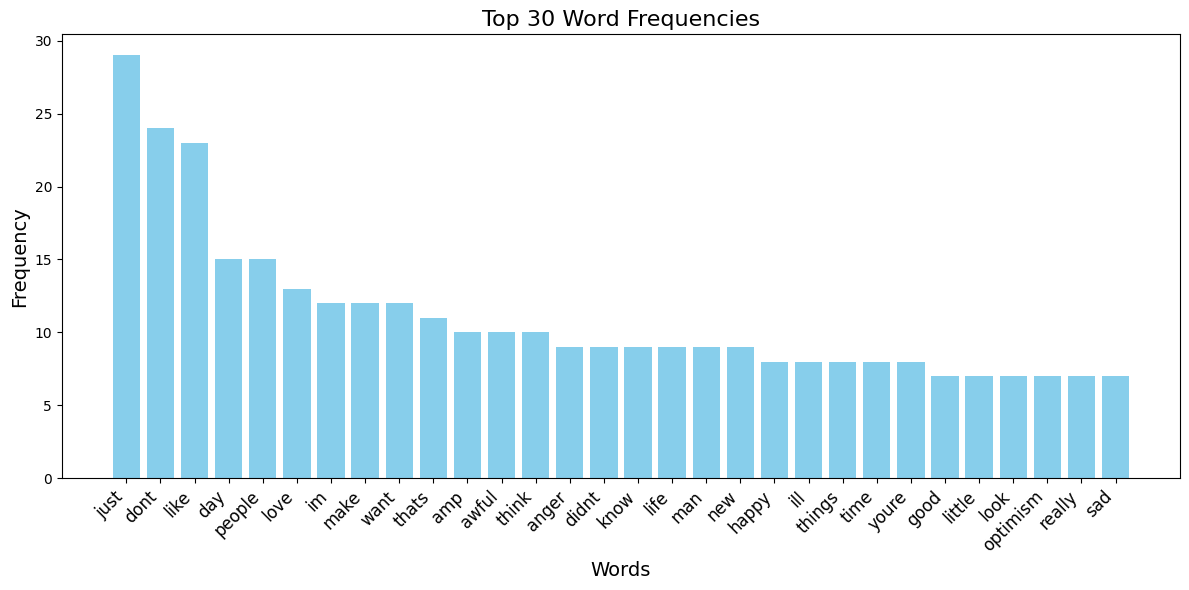

In [8]:
# My answer: Test DF

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

test_df["cleaned_text"] = test_df["text"].str.replace(r"[^a-zA-Z\s]", "", regex=True).str.lower()

count_vect = CountVectorizer(stop_words="english")  
X_counts = count_vect.fit_transform(test_df["cleaned_text"]) 

term_frequencies = X_counts.toarray().sum(axis=0)  
feature_names = count_vect.get_feature_names_out() 

data = pd.DataFrame({"Feature": feature_names, "Frequency": term_frequencies})
top_data = data.nlargest(30, "Frequency")  

plt.figure(figsize=(12, 6))
plt.bar(top_data["Feature"], top_data["Frequency"], color="skyblue")
plt.title("Top 30 Word Frequencies", fontsize=16)
plt.xlabel("Words", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()  
plt.show()

---
### >>> Exercise 2 (Take home):  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [26]:
# Answer here
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

try:
    nltk.data.find('tokenizers/punkt')
except:
    nltk.download('punkt', download_dir='/kaggle/working/')
    nltk.data.path.append('/kaggle/working/')

TFIDF_1000 = TfidfVectorizer(
    max_features=1000,  
    tokenizer=nltk.word_tokenize,  
    stop_words="english"  
)

TFIDF_1000.fit(train_df['text'])
train_data_TFIDF_features_1000 = TFIDF_1000.transform(train_df['text'])
print("TF-IDF Feature Shape:", train_data_TFIDF_features_1000.shape)

feature_names_1000 = TFIDF_1000.get_feature_names_out()
print("Feature Names [100:110]:", feature_names_1000[100:110])

TF-IDF Feature Shape: (3613, 1000)
Feature Names [100:110]: ['ball' 'balls' 'based' 'bb18' 'bc' 'bday' 'beat' 'beautiful' 'bed'
 'behavior']


---
### >>> Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

All the numbers in the confusion matrix adds up to 347, which is the size of the test set. This confusion matrix presents the predicted labels vs the actual labels of the classifier as a more detailed explanation to how the performance evaluation scores are being derived. Take "anger" for example, among the 84 actual labels of "anger", only 59 is correctly predicted as "anger" (true positive), while 15 is predicted as "fear", 7 as "joy" and 3 as "sadness" (false negative). This explains why the recall socre for anger is 59/84 =0.702. 

---
### >>> Exercise 4 (Take home): 
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [34]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# For a classification problem, provide both training and testing data
X_train = BOW_500.transform(train_df['text'])  # Transform training text into BOW features
y_train = train_df['emotion']  # Labels for training data

X_test = BOW_500.transform(test_df['text'])  # Transform testing text into BOW features
y_test = test_df['emotion']  # Labels for testing data

# Check data dimensions (a good practice)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

# Build a Naive Bayes classifier
NB_model = MultinomialNB()  # MultinomialNB works well with text features like BOW or TF-IDF

# Train the model
NB_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

# Check the first 10 predictions on test data
print('First 10 predictions:', y_test_pred[:10])

# Calculate accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('Training accuracy: {:.2f}'.format(acc_train))
print('Testing accuracy: {:.2f}'.format(acc_test))

# Precision, recall, F1-score
print(classification_report(y_true=y_test, y_pred=y_test_pred))

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)
First 10 predictions: ['sadness' 'joy' 'fear' 'joy' 'sadness' 'sadness' 'fear' 'fear' 'anger'
 'fear']
Training accuracy: 0.79
Testing accuracy: 0.70
              precision    recall  f1-score   support

       anger       0.68      0.65      0.67        84
        fear       0.73      0.77      0.75       110
         joy       0.75      0.70      0.72        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.70       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



---
### >>> Exercise 5 (Take home):   

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes Model outperforms the Decision Tree model according to the performance evaluation metrics. While the training accuracy of the Naive Bayes (0.79) is significantly lower than that of the Decision Tree (0.99), its test accuracy of 0.70 is not only higher than Decision Tree's 0.67, but also much closer to its train accuracy. The comparison of train vs test performance shows how Decision Trees are prone to overfitting while Naive Bayes's probabilistic approach generalizes well to unseen data.

---
### >>> Exercise 6 (Take home): 

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!
<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

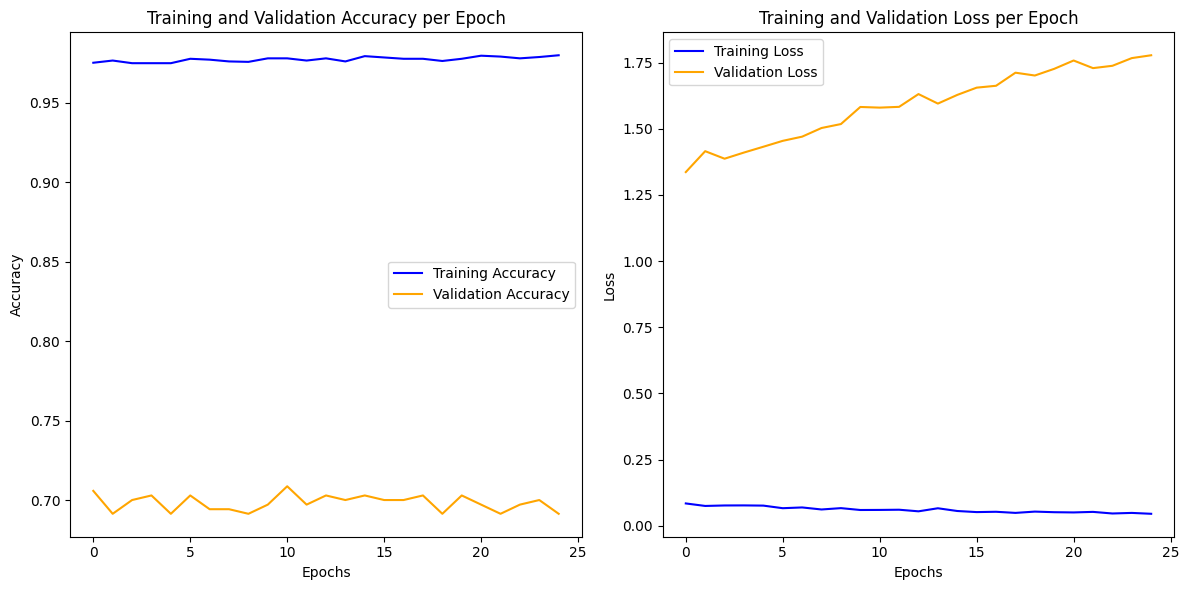

In [50]:
# Answer here
import pandas as pd
import matplotlib.pyplot as plt

log_df = pd.read_csv('training_log.csv')

epochs = log_df['epoch']
train_accuracy = log_df['accuracy']
val_accuracy = log_df['val_accuracy']
train_loss = log_df['loss']
val_loss = log_df['val_loss']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1. Accuracy Plot Analysis:

The training accuracy is consistently high with little fluctuations, indicating that the model is learning and fitting the training data well. On the other hand, the validation accuracy is consistently low and fluctuates a lot. This discrepancy suggests that the model is overfitting to the training data, it likely memorizes patterns in the training data and fails to generalise those patterns to the validation set. 

2. Loss Plot Analysis: The downward slope of the training loss indicates that the model is progressively minimizing the error on the training set. On the other hand, the validation loss curve is upward sloping while increasing in steepness as well. Similar to the accuracy analysis, the behavior of the validation loss suggests overfitting. Despite a steady decrease in training loss, the validation loss fails to show improvement. This indicates that the model is not generalizing well to new, unseen data, and is instead fitting too closely to the training data.

---
### >>> Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


1. Break the input sentence into words and map those individual words to the word vectors.
2. Combine the corresponding word vectors to represent a sentence vector


---
### >>> Exercise 8 (Take home): 

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [71]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

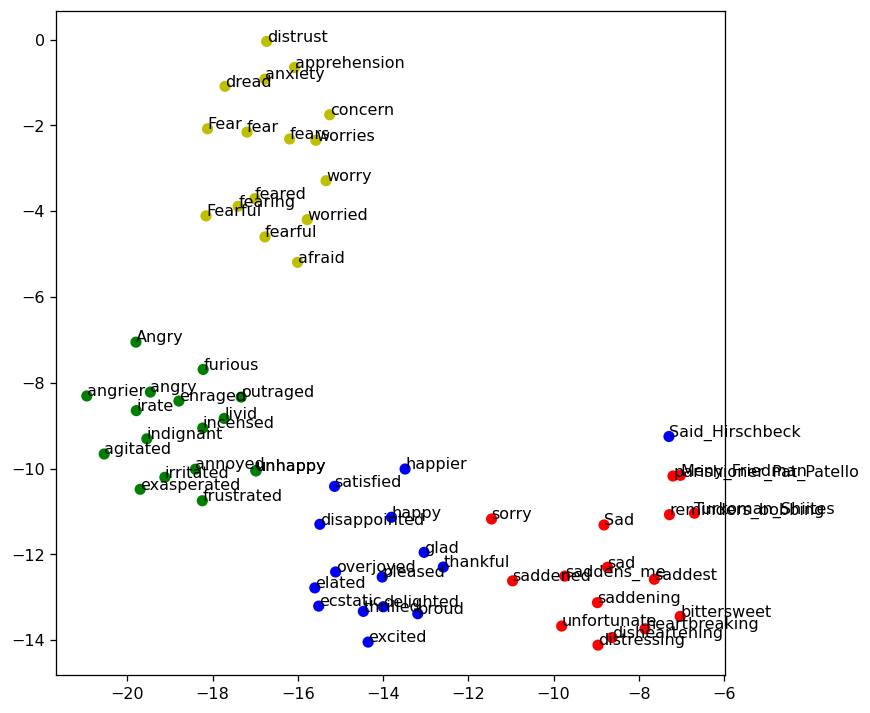

In [72]:
# Answer here
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

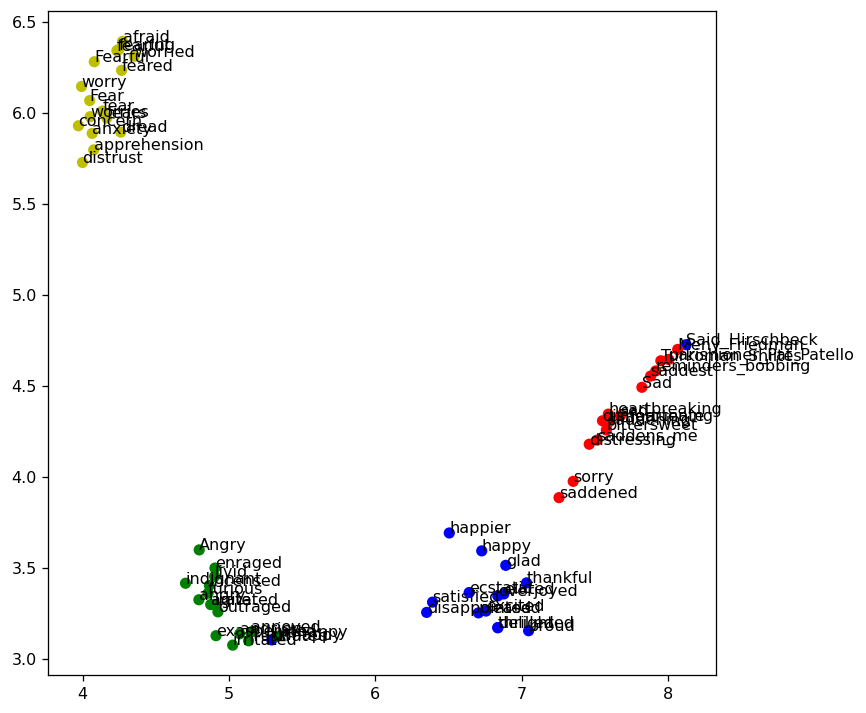

In [73]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

Analysis: 

As compared to top 5, top 15 words include more irrelevant terms such as 'Said_Hirschbeck' in happy which distorts the clustering outcomes in both models. While individual points are more scattered (especially for the TSNE chart), as these 4 words are all related to emotions, clusters are closer to one another in both charts as compared to the top 5 charts. 

---
### >>> Exercise 9 (Take home):  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

---
There are 2 other roles in ollama apart from user, being system and assistant. The role system is able to instruct the assistant on how exactly to respond to a user's request. An example is provided in the code below, where the same question of "What is data mining?" by the user triggers a more interesting response with similar content. 

In [101]:
# Answer here
import ollama

response = ollama.chat(
    model='llama3.2',
    messages=[
        {
            'role': 'system',
            'content': 'You are a friendly and humorous tutor who provides interesting examples to make concepts easy to understand.'
        },
        {
            'role': 'user',
            'content': 'Can you explain what is data mining?'
        }
    ]
)

print(response['message']['content'])

time=2024-12-04T06:56:27.655Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff gpu=GPU-71e983ef-0ca2-3744-daa6-b76044f559c6 parallel=4 available=15615524864 required="3.7 GiB"
time=2024-12-04T06:56:27.855Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="24.2 GiB" free_swap="0 B"
time=2024-12-04T06:56:27.856Z level=INFO source=memory.go:343 msg="offload to cuda" layers.requested=-1 layers.model=29 layers.offload=29 layers.split="" memory.available="[14.5 GiB]" memory.gpu_overhead="0 B" memory.required.full="3.7 GiB" memory.required.partial="3.7 GiB" memory.required.kv="896.0 MiB" memory.required.allocations="[3.7 GiB]" memory.weights.total="2.4 GiB" memory.weights.repeating="2.1 GiB" memory.weights.nonrepeating="308.2 MiB" memory.graph.full="424.0 MiB" memory.graph.partial="570.7 MiB"
time=2024-12-04T06:56:27.

[GIN] 2024/12/04 - 06:56:37 | 200 | 10.386114187s |       127.0.0.1 | POST     "/api/chat"
Data Mining - the treasure hunter of the digital world! Imagine you're on a deserted island, surrounded by coconuts and mystery. You need to find valuable treasures (data insights) hidden within the coconuts (your data). That's basically what data mining does!

**What is Data Mining?**

Data mining is the process of discovering patterns, relationships, and insights from large datasets using various algorithms and statistical techniques. It involves analyzing and extracting useful information or "treasures" from a vast amount of data to gain a better understanding of a particular phenomenon or behavior.

Think of it like this: Imagine you have a huge library of books with millions of pages. Data mining is like searching through the shelves for specific books that can help you solve a puzzle or answer a question. You need to look at patterns, relationships, and correlations between different pieces

---
### >>> Exercise 10 (Take home): 

Try asking the model with one image of your choosing. Is the description accurate? Why?

The description of my chosen image is very accurate. However, this accuracy might be because of how prominent and well known Taipei 101 with many public images available. 

In [109]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/kaggle/input/newpic/Taipei 101.jpeg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

time=2024-12-04T07:16:42.917Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-377876be20bac24488716c04824ab3a6978900679b40013b0d2585004555e658 gpu=GPU-71e983ef-0ca2-3744-daa6-b76044f559c6 parallel=4 available=15615524864 required="10.4 GiB"
time=2024-12-04T07:16:43.116Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="24.1 GiB" free_swap="0 B"
time=2024-12-04T07:16:43.118Z level=INFO source=memory.go:343 msg="offload to cuda" projector.weights="579.5 MiB" projector.graph="0 B" layers.requested=-1 layers.model=33 layers.offload=33 layers.split="" memory.available="[14.5 GiB]" memory.gpu_overhead="0 B" memory.required.full="10.4 GiB" memory.required.partial="10.4 GiB" memory.required.kv="6.0 GiB" memory.required.allocations="[10.4 GiB]" memory.weights.total="8.0 GiB" memory.weights.repeating="8.0 GiB" memory.weights.nonrepeating="77.1 MiB" memory.graph.full="1.1 GiB" memory.

[GIN] 2024/12/04 - 07:16:48 | 200 |  5.688482592s |       127.0.0.1 | POST     "/api/chat"


The image captures the majestic Taipei 101 skyscraper, a renowned landmark in Taipei, Taiwan. The building stands tall with 101 floors, its unique design characterized by a light purple glass facade and a white-blue tinted exterior that contrasts beautifully against the deep blue sky. Atop the skyscraper, a spire reaches towards the heavens, crowned with a golden star that adds to the structure's grandeur. The city lights of Taipei form a vibrant backdrop, their glow illuminating the foreground and adding depth to the scene. The image is taken from a low angle, further emphasizing the skyscraper's impressive height and dominance in the cityscape.

---
### >>> Exercise 11 (Take home): 

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

The responses given are very inaccurate for all three questions. For the second one, it is understandable since it cannot access real time data, which is a big disadvantage. 

In [113]:
# Answer here
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2"  # You can change this to any preferred model

# Function to load, split, and retrieve documents from a URL
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load()  # Load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)  # Split the URL into chunks for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)  # Create a vector space for comparison
    return vectorstore.as_retriever()

# Define URLs and their corresponding questions
urls = [
    "https://www.taipei-101.com.tw",
    "https://www.nytimes.com",  # Add your second URL here
    "https://www.cwa.gov.tw/V8/E/W/County/County.html?CID=63"  # Add your third URL here
]

questions = {
    "What information are relevant for tourists?": urls[0],
    "What are today's headlines?": urls[1],
    "Will it rain next week?": urls[2]
}

# Create retrievers for each URL
retrievers = {url: load_and_retrieve_docs(url) for url in urls}

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)  # Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain for each question and its corresponding URL
def rag_chain(question, url):
    # Use the retriever for the specific URL
    retriever = retrievers[url]
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Loop through each question, retrieve relevant documents, and get responses
results = {}
for question, url in questions.items():
    result = rag_chain(question, url)
    results[question] = result

# Display the results for each question
for question, answer in results.items():
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    print("\n" + "-"*50 + "\n")

time=2024-12-04T07:34:28.231Z level=INFO source=sched.go:714 msg="new model will fit in available VRAM in single GPU, loading" model=/root/.ollama/models/blobs/sha256-dde5aa3fc5ffc17176b5e8bdc82f587b24b2678c6c66101bf7da77af9f7ccdff gpu=GPU-71e983ef-0ca2-3744-daa6-b76044f559c6 parallel=4 available=15615524864 required="3.7 GiB"
time=2024-12-04T07:34:28.434Z level=INFO source=server.go:105 msg="system memory" total="31.4 GiB" free="24.1 GiB" free_swap="0 B"
time=2024-12-04T07:34:28.435Z level=INFO source=memory.go:343 msg="offload to cuda" layers.requested=-1 layers.model=29 layers.offload=29 layers.split="" memory.available="[14.5 GiB]" memory.gpu_overhead="0 B" memory.required.full="3.7 GiB" memory.required.partial="3.7 GiB" memory.required.kv="896.0 MiB" memory.required.allocations="[3.7 GiB]" memory.weights.total="2.4 GiB" memory.weights.repeating="2.1 GiB" memory.weights.nonrepeating="308.2 MiB" memory.graph.full="424.0 MiB" memory.graph.partial="570.7 MiB"
time=2024-12-04T07:34:28.

[GIN] 2024/12/04 - 07:34:30 | 200 |  2.854368718s |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |  204.636463ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |  195.735479ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |   74.064524ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |     24.6071ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |    99.47357ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |  101.179553ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:31 | 200 |  101.197629ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:32 | 200 |  112.996808ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:32 | 200 |  100.989876ms |       127.0.0.1 | POST     "/api/embeddings"
[GIN] 2024/12/04 - 07:34:32 | 

---
### >>> Exercise 12 (Take home):

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

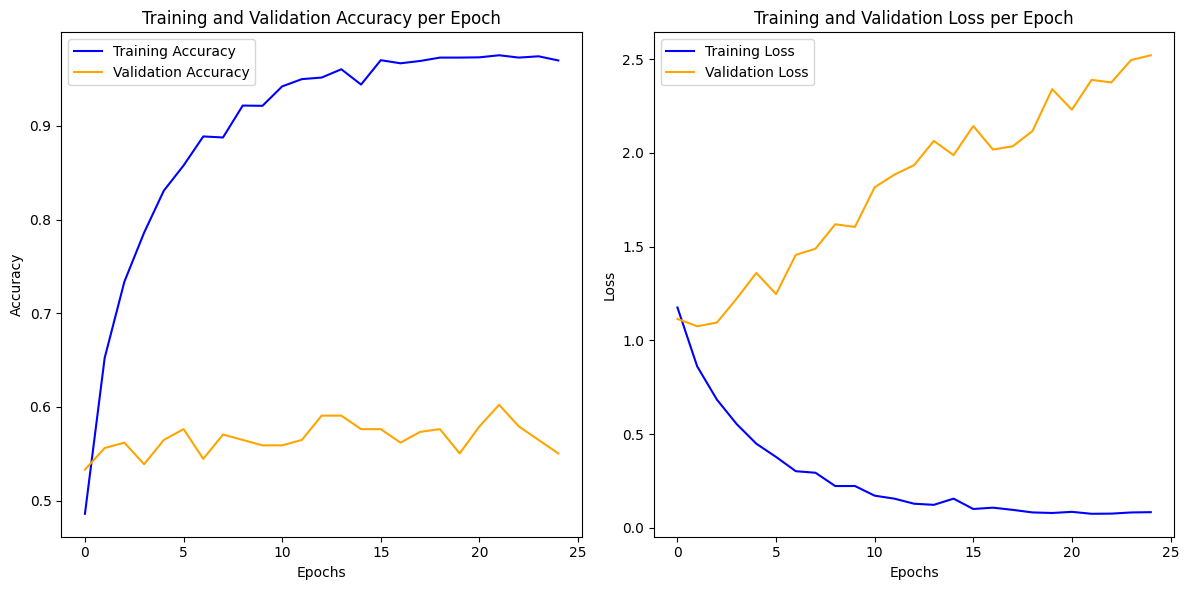

In [138]:
# Answer here

# Answer here
import pandas as pd
import matplotlib.pyplot as plt

log_df = pd.read_csv('training_log_2.csv')

epochs = log_df['epoch']
train_accuracy = log_df['accuracy']
val_accuracy = log_df['val_accuracy']
train_loss = log_df['loss']
val_loss = log_df['val_loss']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='orange')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Analysis:

1. Comparing the confusion matrix for KNN and NN, it is evident that NN outperforms KNN as it has a higher number of True Positives across all 4 emotions.
2. Looking at the accuracy and loss plots, we can see that while the trends for NN are different as compared to question 6, where the training graphs are more exponential in nature as compared to being linear previously, the same problem of overfitting exists where the model consistently performs better on training data but unable to generalise well. The tendency to overfit is is higher for NN. 

---
### >>> Exercise 13 (Take home): 

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

Analysis:

Performance ranking from worst to best is zero-shot, 1-shot and 5-shot. This is evident from the increase in accuracy level from 45.00% to 50.00% to 53.75%. This improvement in performance is intuitive since most learning materials are fed into the model for 5-shot prompting allowing the model to have a better understanding of the context and thus make better predictions. However, it is worth noting that zero-shot prompting's performance is rather impressive without any contextual information and that the rate of improvement slows down as prompts increase. 